In [87]:
# !pip install segyio
# !pip install devito
# from google.colab import files

# uploaded = files.upload('myfile')  # Manually upload your .sgy file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import segyio
import scipy
import scipy.ndimage as ndi

In [89]:
# import pylops





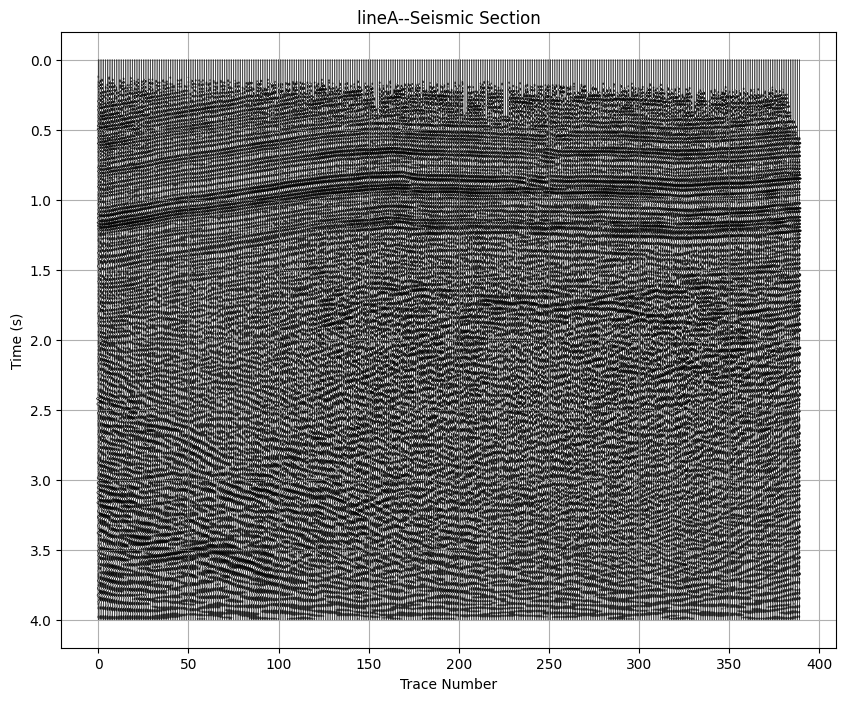

In [4]:
# File path to the SEG-Y file
file_path = "/home/simlab120/Documents/ARINDAM_Msc/1st stage/lineA.sgy"

# Open the SEG-Y file
with segyio.open(file_path, "r", strict=False) as segyfile:
    segyfile.mmap()  # Memory map for fast access
    data = segyio.collect(segyfile.trace.raw[:])  # Collect all traces
    sampling_interval = segyfile.bin[segyio.BinField.Interval] / 1e6  # Convert microseconds to seconds
    n_traces, n_samples = data.shape
    time = np.linspace(0, (n_samples - 1) * sampling_interval, n_samples)  # Create time vector

# Plot seismic data with wiggles
plt.figure(figsize=(10, 8))
for i in range(n_traces):
    trace_data = data[i] / np.max(np.abs(data[i]))  # Normalize amplitude
    plt.plot(trace_data + i, time, color="black", linewidth=0.5)  # Plot wiggle
    plt.fill_betweenx(time, trace_data + i, i, where=(trace_data > 0), color="black", alpha=0.7)  # Fill positive

# Set plot details
plt.gca().invert_yaxis()  # Time increases downward
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.title("lineA--Seismic Section")
plt.grid(True)

# Save the plot as a PDF
# plt.savefig("lineA_seismic_section.pdf", format="pdf", bbox_inches="tight")  # Provide filename
plt.show()


In [5]:
data.shape

(390, 1001)

In [6]:
# # Open the SEG-Y file
# with segyio.open(file_path, "r", strict=False) as segyfile:
#     segyfile.mmap()  # Memory map for fast access
#     trace_idx = 389  # Index of the trace to plot
#     trace_data = segyfile.trace[trace_idx]  # Extract trace
#     sampling_interval = segyfile.bin[segyio.BinField.Interval] / 1e6  # Convert microseconds to seconds
#     n_samples = len(trace_data)
#     time = np.linspace(0, (n_samples - 1) * sampling_interval, n_samples)  # Create time vector

# # Create the wiggle plot for the single trace
# plt.figure(figsize=(3,10))
# plt.plot(trace_data, time, color="black", linewidth=1)  # Plot the trace line
# plt.fill_betweenx(time, trace_data, 0, where=(trace_data > 0), color="black", alpha=0.7)  # Fill positive
# plt.fill_betweenx(time, trace_data, 0, where=(trace_data < 0), color="red", alpha=0.7)  # Fill negative

# # Set plot details
# plt.gca().invert_yaxis()  # Time increases downward
# plt.xlabel("Amplitude")
# plt.ylabel("Time (s)")
# plt.title(f"Wiggle Plot of Seismic Trace {trace_idx}")
# plt.grid(True)
# plt.show()


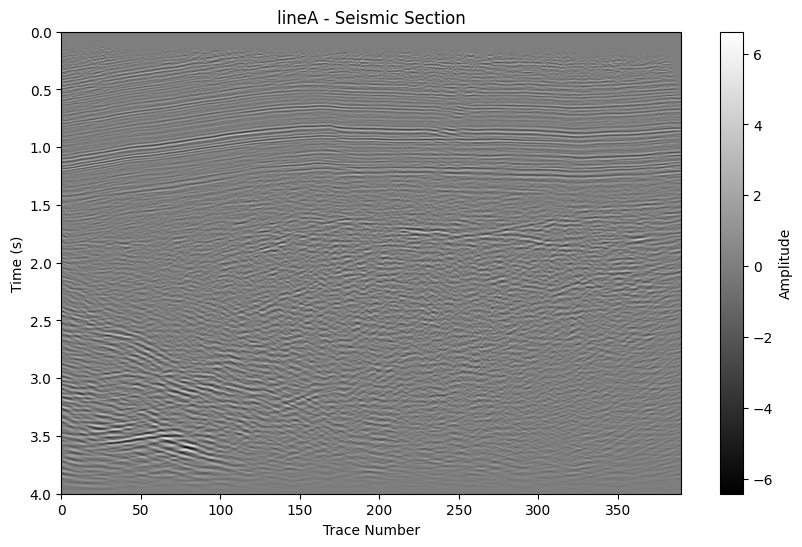

In [7]:
# Grey Scale Image

plt.figure(figsize=(10, 6))
plt.imshow(data.T, cmap="gray", aspect="auto", extent=[0, n_traces, max(time), min(time)])
plt.colorbar(label="Amplitude")
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.title("lineA - Seismic Section")
plt.grid(False)  # Turn off grid for a cleaner grayscale image

# Save the plot as a PDF (optional)
# plt.savefig("lineA_seismic_section.pdf", format="pdf", bbox_inches="tight")

plt.show()


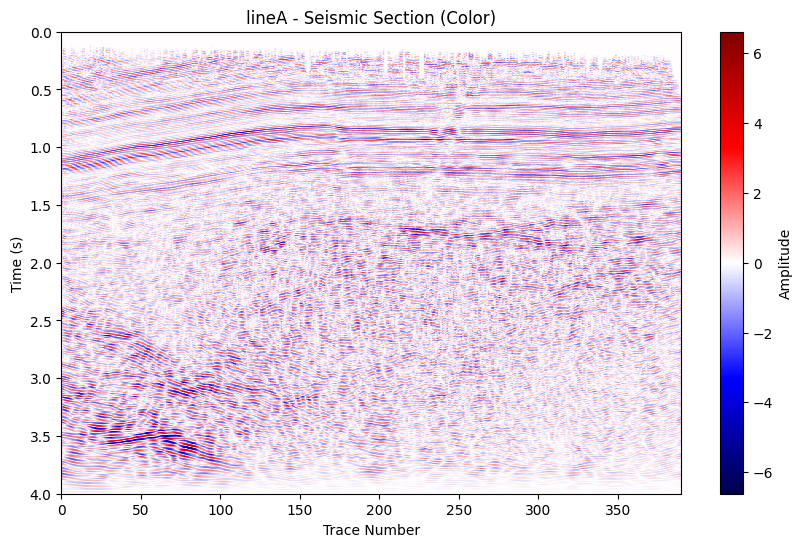

In [8]:
# Color Seismic Image

plt.figure(figsize=(10, 6))
plt.imshow(data.T, cmap="seismic", aspect="auto", extent=[0, n_traces, max(time), min(time)],
           vmin=-np.max(np.abs(data)), vmax=np.max(np.abs(data)))  # Symmetric color scaling
plt.colorbar(label="Amplitude")  # Add a colorbar to interpret the amplitudes
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.title("lineA - Seismic Section (Color)")
plt.grid(False)  # Turn off the grid for a clean look

# Save the plot as a PDF (optional)
# plt.savefig("lineA_seismic_section_color.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [9]:
# np.max(abs(data))
# np.min(abs(data))
# np.mean(abs(data))

In [10]:
sigma_gaus_der = 0.5

grad_x=ndi.gaussian_filter(data,sigma=sigma_gaus_der,
                           order=[1,0],output=np.float64, mode='nearest')
grad_t=ndi.gaussian_filter(data,sigma=sigma_gaus_der,
                           order=[0,1],output=np.float64, mode='nearest')

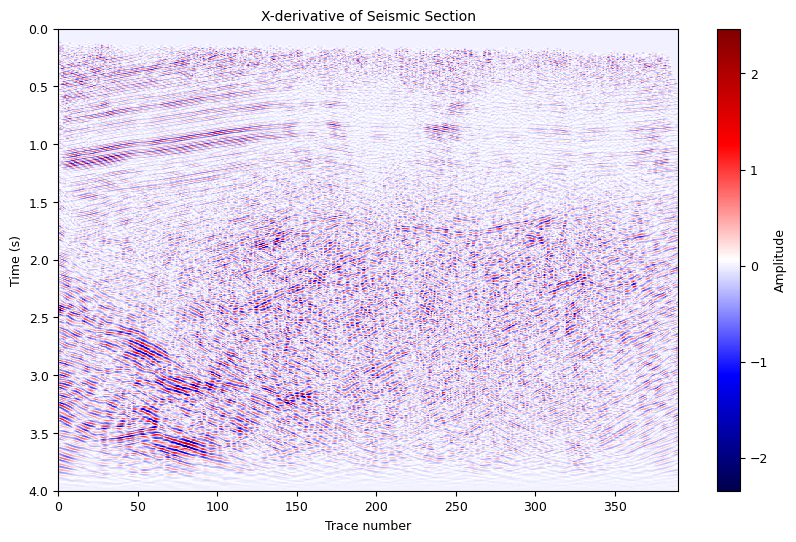

In [11]:
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()  # Time increases downward

# Plot the x-derivative of the seismic section
im = plt.imshow(grad_x.T, cmap="seismic", aspect="auto", extent=[0, n_traces, max(time), min(time)])

# Add color bar for amplitude scale
cbar = plt.colorbar(im)  # Use 'im' from the imshow plot
cbar.set_label("Amplitude", fontsize=9)
cbar.ax.tick_params(labelsize=9)

# Labels and ticks
plt.xlabel("Trace number", fontsize=9)
plt.ylabel("Time (s)", fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.title("X-derivative of Seismic Section", fontsize=10)

# Save the plot as a PDF (optional)
# plt.savefig("lineA_seismic_section.pdf", format="pdf", bbox_inches="tight")

plt.show()


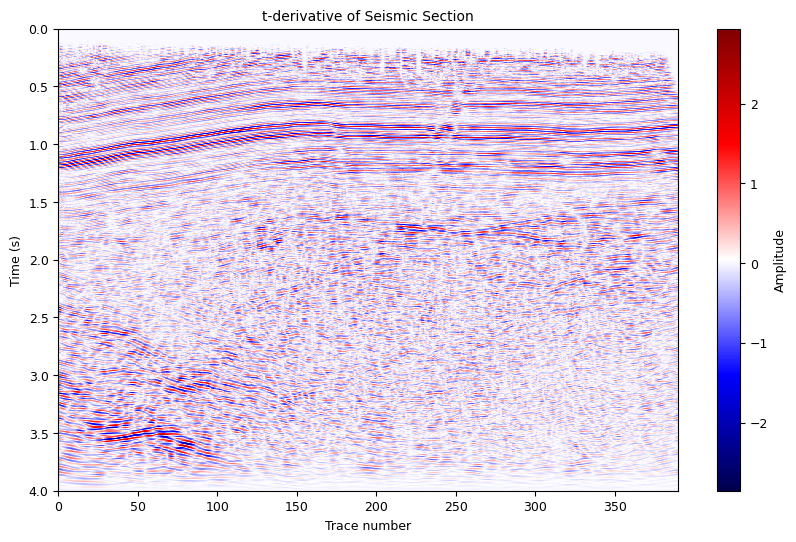

In [12]:
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()  # Time increases downward

# Plot the x-derivative of the seismic section
im = plt.imshow(grad_t.T, cmap="seismic", aspect="auto", extent=[0, n_traces, max(time), min(time)])

# Add color bar for amplitude scale
cbar = plt.colorbar(im)  # Use 'im' from the imshow plot
cbar.set_label("Amplitude", fontsize=9)
cbar.ax.tick_params(labelsize=9)

# Labels and ticks
plt.xlabel("Trace number", fontsize=9)
plt.ylabel("Time (s)", fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.title("t-derivative of Seismic Section", fontsize=10)

# Save the plot as a PDF (optional)
# plt.savefig("lineA_seismic_section.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [13]:
# Compute the structure tensor components
J_11 = grad_x ** 2
J_22 = grad_t ** 2
J_12 = grad_x * grad_t

# Smooth the components using Gaussian filters
sigma_smoothing = 0.5

J_11_smoothed = ndi.gaussian_filter(J_11, sigma=sigma_smoothing, order=[0,0],
                                    output=np.float64, mode='nearest')
J_22_smoothed = ndi.gaussian_filter(J_22, sigma=sigma_smoothing, order=[0,0],
                                    output=np.float64, mode='nearest')
J_12_smoothed = ndi.gaussian_filter(J_12, sigma=sigma_smoothing, order=[0,0],
                                    output=np.float64, mode='nearest')


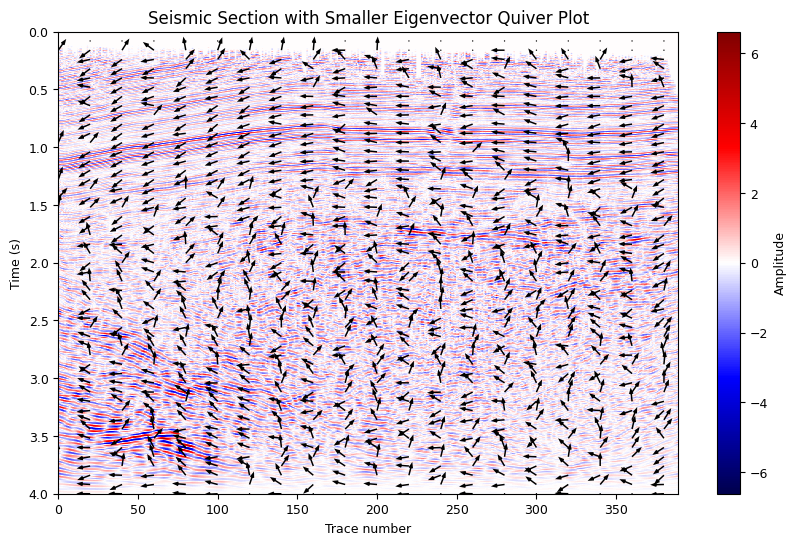

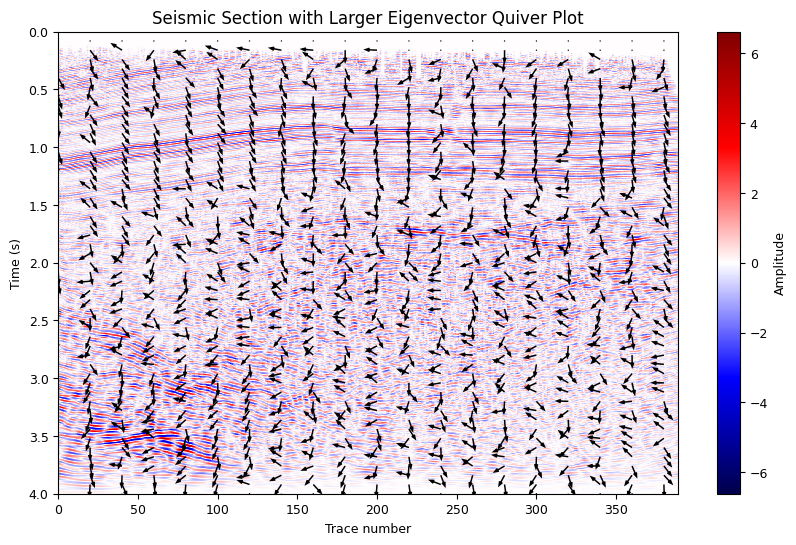

In [14]:
# Perform eigen-decomposition at each point
eigenvectors_u = np.zeros((data.shape[0], data.shape[1], 2))  # Larger eigenvector
eigenvectors_v = np.zeros((data.shape[0], data.shape[1], 2))  # Smaller eigenvector
eigvals = np.zeros((data.shape[0], data.shape[1], 2))

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # Construct the structure tensor
        T = np.array([[J_11_smoothed[i, j], J_12_smoothed[i, j]],
                      [J_12_smoothed[i, j], J_22_smoothed[i, j]]])

        # Compute eigenvalues and eigenvectors
        eigvals[i,j,:], eigvecs = np.linalg.eigh(T)

        # Properly associate eigenvectors
        if np.max(eigvals[i,j,:]) > 1e-4:
            eigenvectors_v[i, j,:] = eigvecs[:, 0]  # Smaller eigenvector
            eigenvectors_u[i, j,:] = eigvecs[:, 1]  # Larger eigenvector
        else:
            eigenvectors_v[i, j,:] = 0 # Smaller eigenvector
            eigenvectors_u[i, j,:] = 0  # Larger eigenvector

# Define x (trace numbers) and t (time axis)
x = np.arange(data.shape[0])  # Trace numbers (390 traces)
dt = 0.004  # Time sampling interval in seconds
t = np.arange(data.shape[1]) * dt  # Time axis (1001 samples, ~4 seconds)

# Create a grid for quiver plot
X, Y = np.meshgrid(x, t)  # Trace numbers on x-axis, time on y-axis

# Subsample for visualization and apply the mask
step = 20
sub_X = X[::step, ::step]
sub_Y = Y[::step, ::step]
#sub_mask = mask[::step, ::step]

sub_eigenvectors_u = eigenvectors_u[::step, ::step]
sub_eigenvectors_v = eigenvectors_v[::step, ::step]

dx_u = sub_eigenvectors_u[:, :, 0].T #* sub_mask
dy_u = -sub_eigenvectors_u[:, :, 1].T #* sub_mask

dx_v = sub_eigenvectors_v[:, :, 0].T #* sub_mask
dy_v = -sub_eigenvectors_v[:, :, 1].T #* sub_mask

# Plot seismic section with smallest eigenvector quiver plot
plt.figure(figsize=(10, 6))
im = plt.imshow(data.T, cmap="seismic", aspect="auto", extent=[x.min(), x.max(), t.max(), t.min()],
                vmin=-np.max(np.abs(data)), vmax=np.max(np.abs(data)))  # Stretch the contrast range

# Add color bar for amplitude scale
cbar = plt.colorbar(im)  # Attach colorbar to 'im'
cbar.set_label("Amplitude", fontsize=9)
cbar.ax.tick_params(labelsize=9)

plt.quiver(sub_X, sub_Y, dx_v, dy_v, color="black", scale=45, headwidth=3, headlength=4)
plt.title("Seismic Section with Smaller Eigenvector Quiver Plot", fontsize=12)
plt.xlabel("Trace number", fontsize=9)
plt.ylabel("Time (s)", fontsize=9)
plt.tick_params(axis="both", which="major", labelsize=9)
plt.show()

# Plot seismic section with largest eigenvector quiver plot
plt.figure(figsize=(10, 6))
im = plt.imshow(data.T, cmap="seismic", aspect="auto", extent=[x.min(), x.max(), t.max(), t.min()],
                vmin=-np.max(np.abs(data)), vmax=np.max(np.abs(data)))  # Stretch the contrast range

# Add color bar for amplitude scale
cbar = plt.colorbar(im)  # Attach colorbar to 'im'
cbar.set_label("Amplitude", fontsize=9)
cbar.ax.tick_params(labelsize=9)

plt.quiver(sub_X, sub_Y, dx_u, dy_u, color="black", scale=45, headwidth=3, headlength=4)
plt.title("Seismic Section with Larger Eigenvector Quiver Plot", fontsize=12)
plt.xlabel("Trace number", fontsize=9)
plt.ylabel("Time (s)", fontsize=9)
plt.tick_params(axis="both", which="major", labelsize=9)
plt.show()




In [15]:
data.shape


(390, 1001)

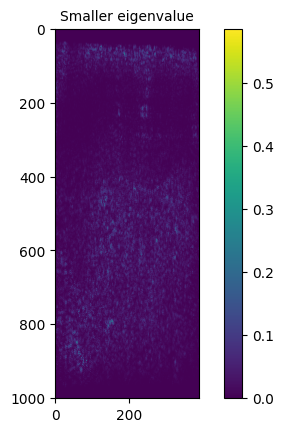

In [16]:
#Smallest Eigen-value
plt.imshow(eigvals[:,:,0].T)
plt.title('Smaller eigenvalue',fontsize=10)
plt.colorbar()

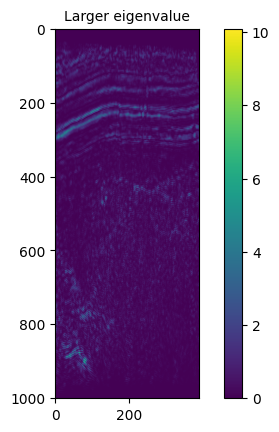

In [17]:
#largest Eigen-value
plt.imshow(eigvals[:,:,1].T)
plt.title('Larger eigenvalue',fontsize=10)
plt.colorbar()

In [18]:
np.max(eigvals[:,:,1])

np.float64(10.09107768916168)

In [19]:
eigvals[:,:,1].shape

(390, 1001)

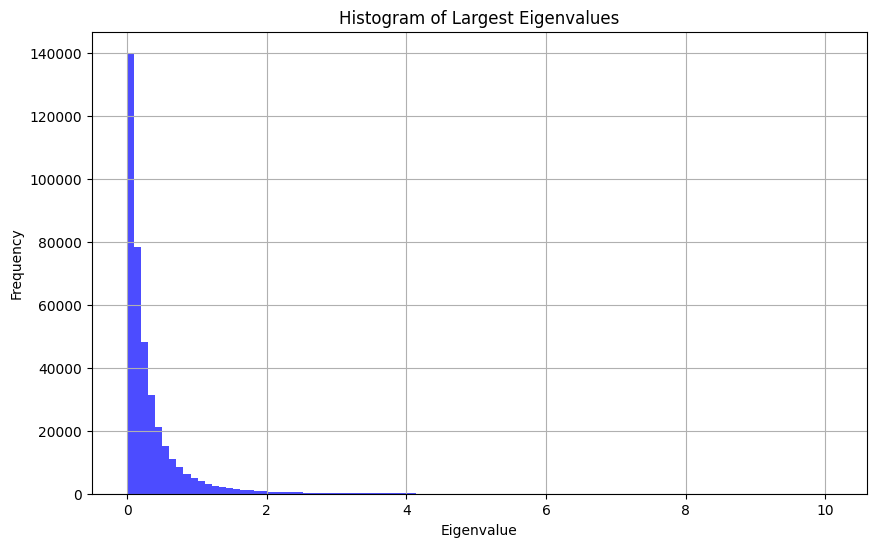

In [20]:

# Flatten the 2D array to 1D for histogram computation
largest_eigenvalues = eigvals[:,:,1].flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(largest_eigenvalues, bins=100, color='blue', alpha=0.7)
plt.title("Histogram of Largest Eigenvalues")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


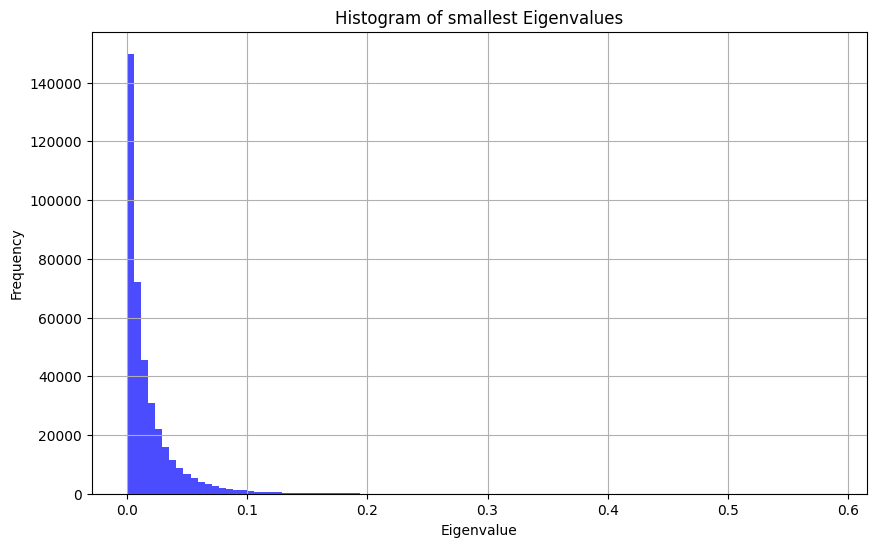

In [21]:

# Flatten the 2D array to 1D for histogram computation
smallest_eigenvalues = eigvals[:,:,0].flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(smallest_eigenvalues, bins=100, color='blue', alpha=0.7)
plt.title("Histogram of smallest Eigenvalues")
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Smoothing Devito


In [108]:
# import numpy as np
# import matplotlib.pyplot as plt
# from devito import Grid, TimeFunction, Function, Operator, Eq

# # Step 1: Initialize the diffusion tensor and compute eigenvalues/eigenvectors
# D = np.zeros((data.shape[0], data.shape[1], 2, 2))  # 2x2 tensor at each point
# eigvals_filtered = np.zeros_like(eigvals)  # Filtered eigenvalues

# # Compute eigenvalues and eigenvectors of T
# for i in range(data.shape[0]):
#     for j in range(data.shape[1]):
#         # Extract eigenvalues and eigenvectors of T
#         T_eigenvalues = eigvals[i, j, :]
#         T_eigenvectors = np.column_stack((eigenvectors_v[i, j], eigenvectors_u[i, j]))

#         # Step 2: Apply percentile filtering to eigenvalues
#         percentile_threshold = np.percentile(eigvals[:, :, 1].flatten(), 95)  # 95th percentile
#         filtered_eigenvalues = np.where(T_eigenvalues >= percentile_threshold, T_eigenvalues, 0)

#         # Save filtered eigenvalues for further use
#         eigvals_filtered[i, j, :] = filtered_eigenvalues

#         # Step 3: Reconstruct D using filtered eigenvalues
#         Lambda_filtered = np.diag(filtered_eigenvalues)
#         D[i, j] = T_eigenvectors @ Lambda_filtered @ T_eigenvectors.T

# # Step 4: Initialize the Devito grid
# shape = data.shape
# spacing = (0.004, 1.0)  # Time and trace spacing
# grid = Grid(shape=shape, extent=(shape[0] * spacing[0], shape[1] * spacing[1]))

# # Time-dependent solution field
# g = TimeFunction(name="g", grid=grid, space_order=2)
# g.data[:] = data  # Initialize with seismic data

# # Define the filtered diffusion tensor components
# D_xx = Function(name="D_xx", grid=grid)
# D_yy = Function(name="D_yy", grid=grid)
# D_xy = Function(name="D_xy", grid=grid)

# # Assign the filtered tensor components
# D_xx.data[:, :] = D[:, :, 0, 0]
# D_yy.data[:, :] = D[:, :, 1, 1]
# D_xy.data[:, :] = D[:, :, 0, 1]


# dt=(0.004)**2/(2*np.max(eigvals[:, :, 1]))
# diffusion_eq = Eq(
#     g.forward,
#     g + dt * (D_xx * g.dx2 + D_yy * g.dy2 + 2 * D_xy * g.dxdy)
# )
# op = Operator([diffusion_eq])

# # Step 7: Apply the operator for the total number of time steps
# total_time_steps = 20
# op.apply(time_M=total_time_steps, dt=dt)

# # Step 8: Plot the final smoothed seismic section
# plt.figure(figsize=(10, 6))
# plt.imshow(
#     g.data[total_time_steps, :, :].T,
#     cmap="seismic",
#     aspect="auto",
#     extent=[0, shape[0], shape[1] * spacing[0], 0]
# )
# plt.title("Final Smoothed Seismic Section")
# plt.xlabel("Trace Number")
# plt.ylabel("Time (s)")
# plt.colorbar(label="Amplitude")
# plt.show()


Operator `Kernel` ran in 0.01 s


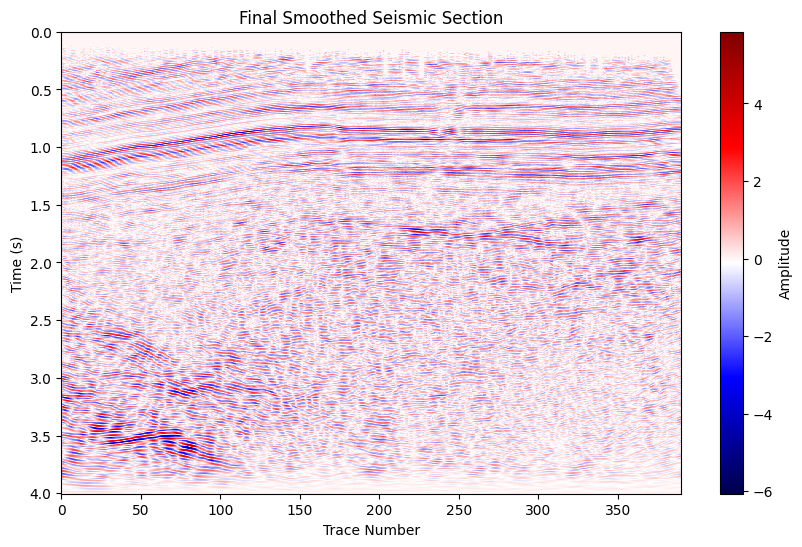

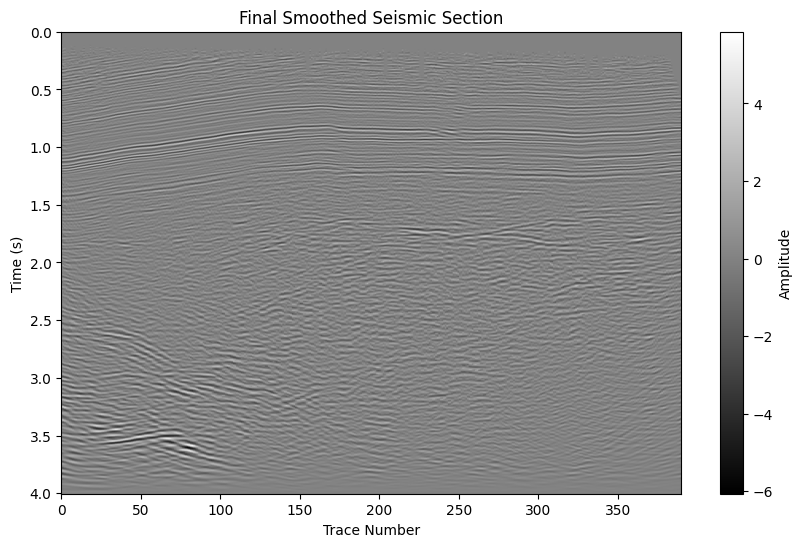

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from devito import Grid, TimeFunction, Function, Operator, Eq

# Step 1: Initialize the diffusion tensor
D = np.zeros((data.shape[0], data.shape[1], 2, 2))  # 2x2 tensor at each point

# Compute the 95th percentile threshold for the smallest eigenvalues (λ1)
percentile_threshold = np.percentile(eigvals[:, :, 0].flatten(), 70)

# Loop through each grid point to process eigenvalues and reconstruct D
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # Extract eigenvalues and eigenvectors of T
        T_eigenvalues = eigvals[i, j, :]
        T_eigenvectors = np.column_stack((eigenvectors_v[i, j], eigenvectors_u[i, j]))

        # Filter smallest eigenvalue (λ1)
        filtered_eigenvalues = np.zeros_like(T_eigenvalues)
        if T_eigenvalues[0] >= percentile_threshold:  # Apply threshold to smallest eigenvalue
            filtered_eigenvalues[0] = T_eigenvalues[0]
        # Set larger eigenvalue (λ2) to zero
        filtered_eigenvalues[1] = 0

        # Reconstruct D using the filtered eigenvalues
        Lambda_filtered = np.diag(filtered_eigenvalues)
        D[i, j] = T_eigenvectors @ Lambda_filtered @ T_eigenvectors.T

# Step 2: Initialize the Devito grid
shape = data.shape
spacing = (0.004, 1.0)  # Time and trace spacing
grid = Grid(shape=shape, extent=(shape[0] * spacing[0], shape[1] * spacing[1]))

# Time-dependent solution field
g = TimeFunction(name="g", grid=grid, space_order=2)
g.data[:] = data  # Initialize with seismic data

# Define the filtered diffusion tensor components
D_xx = Function(name="D_xx", grid=grid)
D_yy = Function(name="D_yy", grid=grid)
D_xy = Function(name="D_xy", grid=grid)

# Assign the filtered tensor components
D_xx.data[:, :] = D[:, :, 0, 0]
D_yy.data[:, :] = D[:, :, 1, 1]
D_xy.data[:, :] = D[:, :, 0, 1]

# Step 3: Compute a stable time step size (dt) based on the CFL condition
dt = (0.004)**2 / (2 * np.max(eigvals[:, :, 0]))  # Use the largest filtered λ1 for stability

# Step 4: Define the diffusion equation
diffusion_eq = Eq(
    g.forward,
    g + dt * (D_xx * g.dx2 + D_yy * g.dy2 + 2 * D_xy * g.dxdy)
)

# Step 5: Create and apply the operator
op = Operator([diffusion_eq])
total_time_steps = 40
op.apply(time_M=total_time_steps, dt=dt)

# Step 6: Plot the final smoothed seismic section
plt.figure(figsize=(10, 6))
plt.imshow(
    g.data[total_time_steps, :, :].T,
    cmap="seismic",
    aspect="auto",
    extent=[0, shape[0], shape[1] * spacing[0], 0]
)
plt.title("Final Smoothed Seismic Section")
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.colorbar(label="Amplitude")
plt.show()


# Step 6: Plot the final smoothed seismic section
plt.figure(figsize=(10, 6))
plt.imshow(
    g.data[total_time_steps, :, :].T,
    cmap="grey",
    aspect="auto",
    extent=[0, shape[0], shape[1] * spacing[0], 0]
)
plt.title("Final Smoothed Seismic Section")
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.colorbar(label="Amplitude")
plt.show()


In [23]:
print(np.max(data.T- g.data[total_time_steps, :, :].T))

3.1126995


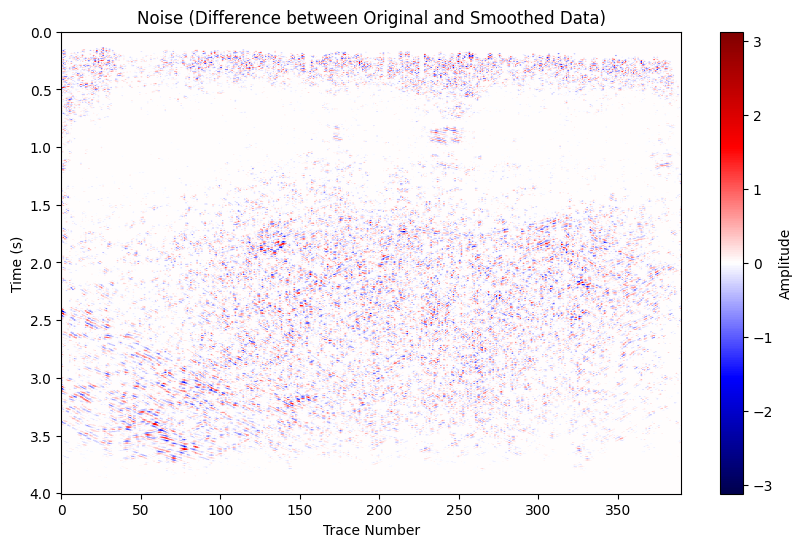

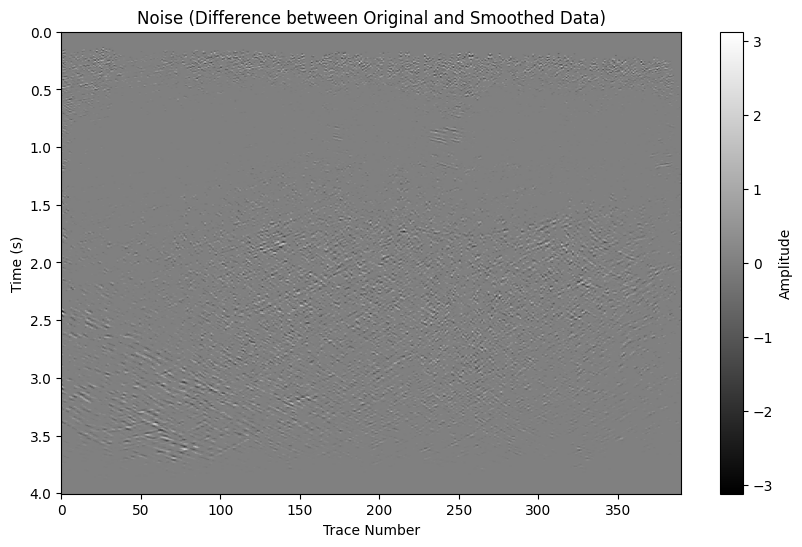

In [24]:
# Step 1: Compute the noise as the difference between the original and smoothed data
noise = data.T - g.data[total_time_steps, :, :].T

# Step 2: Plot the noise image
plt.figure(figsize=(10, 6))
plt.imshow(
    noise,
    cmap="seismic",
    aspect="auto",
    extent=[0, shape[0], shape[1] * spacing[0], 0],
    vmin=-np.max(np.abs(noise)),  # Symmetric color range for better contrast
    vmax=np.max(np.abs(noise))
)
plt.title("Noise (Difference between Original and Smoothed Data)")
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.colorbar(label="Amplitude")
plt.show()



plt.figure(figsize=(10, 6))
plt.imshow(
    noise,
    cmap="grey",
    aspect="auto",
    extent=[0, shape[0], shape[1] * spacing[0], 0],
    vmin=-np.max(np.abs(noise)),  # Symmetric color range for better contrast
    vmax=np.max(np.abs(noise))
)
plt.title("Noise (Difference between Original and Smoothed Data)")
plt.xlabel("Trace Number")
plt.ylabel("Time (s)")
plt.colorbar(label="Amplitude")
plt.show()




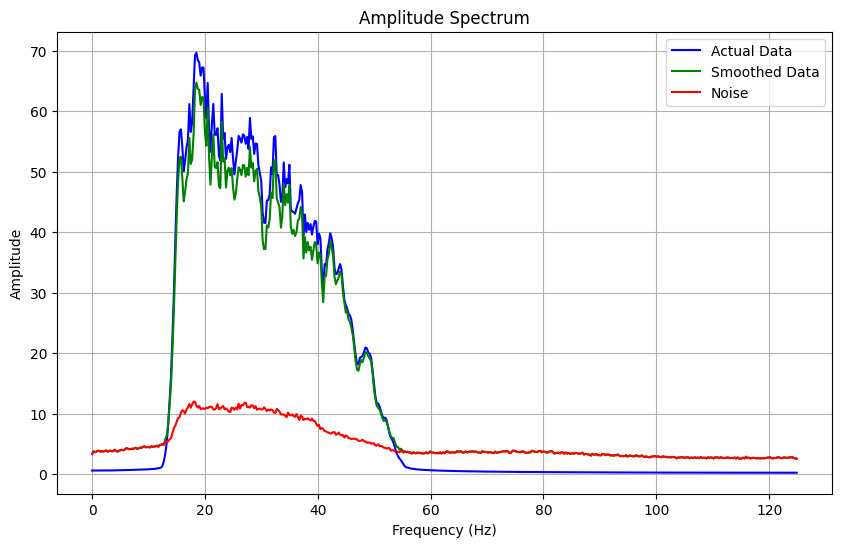

In [25]:

# Compute the noise
noise = data.T - g.data[total_time_steps, :, :].T

# Function to compute the amplitude spectrum
def amplitude_spectrum(data, sampling_interval):
    # Perform FFT along the time axis (rows of the data matrix)
    spectrum = np.fft.rfft(data, axis=0)
    amplitude = np.abs(spectrum)  # Compute magnitude
    freqs = np.fft.rfftfreq(data.shape[0], d=sampling_interval)  # Frequency axis
    return freqs, amplitude

# Sampling interval (Δt in seconds)
sampling_interval = 0.004

# Compute amplitude spectra
freqs, spectrum_actual = amplitude_spectrum(data.T, sampling_interval)
_, spectrum_smoothed = amplitude_spectrum(g.data[total_time_steps, :, :].T, sampling_interval)
_, spectrum_noise = amplitude_spectrum(noise, sampling_interval)

# Plot amplitude spectrum for each case
plt.figure(figsize=(10, 6))

# Actual Data
plt.plot(freqs, np.mean(spectrum_actual, axis=1), label="Actual Data", color="blue")

# Smoothed Data
plt.plot(freqs, np.mean(spectrum_smoothed, axis=1), label="Smoothed Data", color="green")

# Noise
plt.plot(freqs, np.mean(spectrum_noise, axis=1), label="Noise", color="red")

# Plot settings
plt.title("Amplitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
